<a href="https://colab.research.google.com/github/falwa-alkhalifah/Mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [447]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
#%pip install yellowbrick
#%pip install kneed

In [448]:
url = 'https://raw.githubusercontent.com/falwa-alkhalifah/Mining-project/refs/heads/main/Dataset/Dataset%20of%20Diabetes%20.csv'

df  = pd.read_csv(url)

In [449]:
#This code converts categorical data into numbers using Label Encoding.
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = le.fit_transform(df['CLASS'])
print(df)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1

In [450]:
#select top 5 important features for classification.
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['CLASS'] = LabelEncoder().fit_transform(df['CLASS'])

X = df.drop(columns=["CLASS"])
X = X.select_dtypes(include=["number"])
y = df['CLASS']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['AGE', 'HbA1c', 'Chol', 'TG', 'BMI']


In [451]:
#remove features with low variance (less than 0.1).
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()]
print("Selected Features after Variance Threshold:", selected_features.tolist())

Selected Features after Variance Threshold: ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


First split: 70% for training, 30% for testing.

Decision Tree (Gini Index):
Accuracy: 0.9766666666666667
[[ 35   0   1   0]
 [  0  10   0   0]
 [  2   1 248   2]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           2       0.91      1.00      0.95        10
           3       0.99      0.98      0.99       253
           4       0.00      0.00      0.00         1

    accuracy                           0.98       300
   macro avg       0.71      0.74      0.72       300
weighted avg       0.98      0.98      0.98       300


Decision Tree (Entropy - Information Gain):
Accuracy: 0.9833333333333333
[[ 35   0   1   0]
 [  0  10   0   0]
 [  1   0 250   2]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        10
           3       0.99      0.99      0.99       253
           4       0.00      0.00      0.00         1

    accu

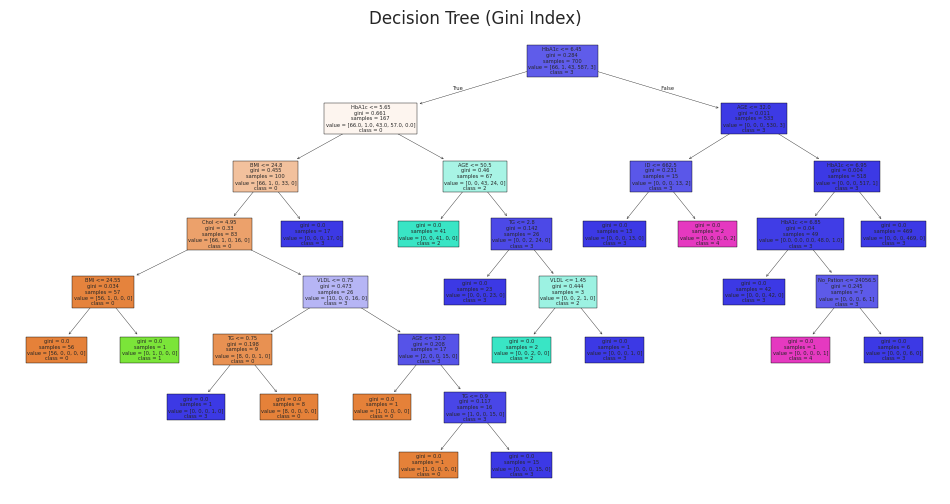

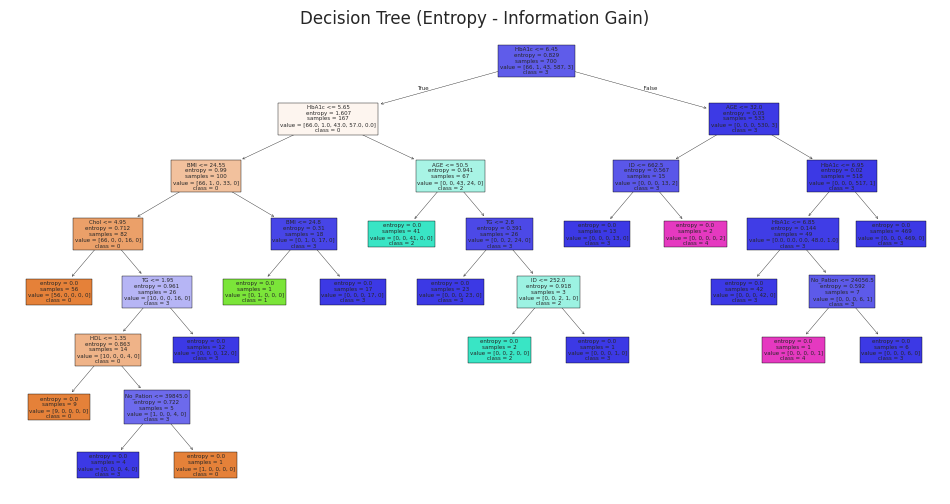

In [452]:
#splits the data (70% for training, 30% for testing), trains and compares two Decision Tree classifiers,
#one using Gini Index and the other using Entropy (Information Gain), then evaluates their accuracy and visualizes the trees.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

print("Decision Tree (Gini Index):")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\nDecision Tree (Entropy - Information Gain):")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

plt.figure(figsize=(12, 6))
# Convert class labels to strings for visualization
class_names = [str(label) for label in df['CLASS'].unique()]
tree.plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Gini Index)")
plt.show()

plt.figure(figsize=(12, 6))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Entropy - Information Gain)")
plt.show()

Second split: 80% training, 20% testing.

Third split: 90% training, 10% testing.

Decision Tree (Gini Index):
Accuracy: 0.96
[[14  0  0  0]
 [ 0  3  0  0]
 [ 1  0 79  2]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         3
           3       0.99      0.96      0.98        82
           4       0.00      0.00      0.00         1

    accuracy                           0.96       100
   macro avg       0.73      0.74      0.74       100
weighted avg       0.97      0.96      0.96       100


Decision Tree (Entropy - Information Gain):
Accuracy: 0.96
[[14  0  0  0]
 [ 0  3  0  0]
 [ 1  1 79  1]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           2       0.75      1.00      0.86         3
           3       0.99      0.96      0.98        82
           4       0.00      0.00      0.00         1

    accuracy                           0.96       100
   macro avg  

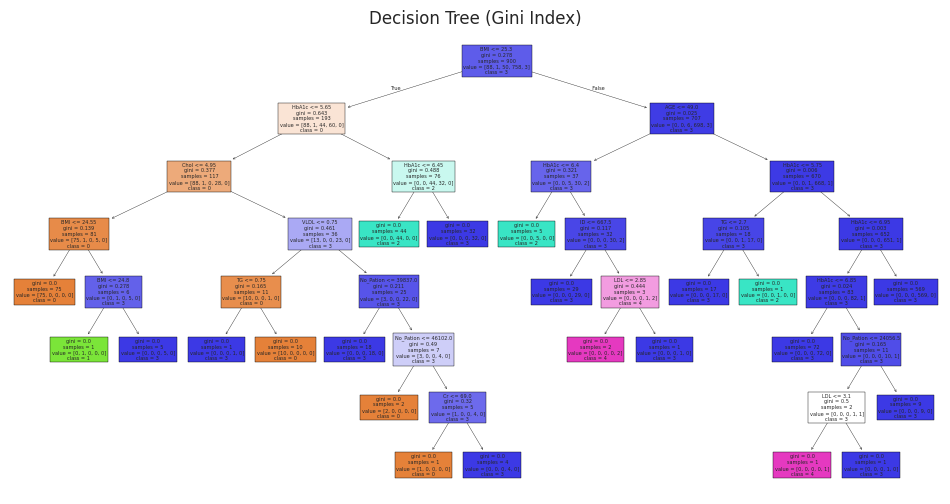

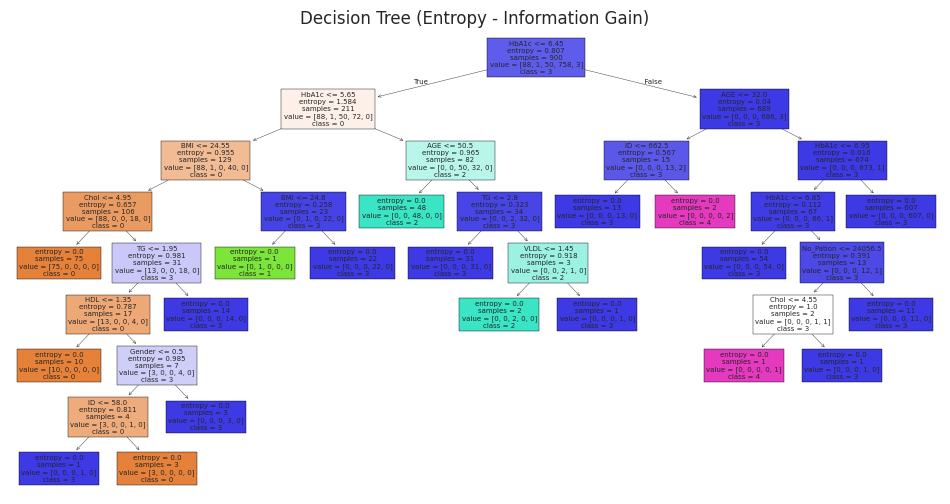

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

print("Decision Tree (Gini Index):")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\nDecision Tree (Entropy - Information Gain):")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

plt.figure(figsize=(12, 6))
# Convert class labels to strings for visualization
class_names = [str(label) for label in df['CLASS'].unique()]
tree.plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Gini Index)")
plt.show()

plt.figure(figsize=(12, 6))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Entropy - Information Gain)")
plt.show()


# Clustering

**Data Preprocessing:** drop irrelevant columns by removing ID, No_Pation, and CLASS (identifiers and target variable), encode categorical data and normalization

In [454]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['ID', 'No_Pation', 'CLASS'])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(df.head())

    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  CLASS  
0  24.0      0  
1  23.0      0  
2  24.0      0  
3  24.0      0  
4  21.0      0  


**Choosing k values:** we chose different random values of k, which are 2,3,4,5 and 6. values from 2 to 6 were chosen to reflect potential real-world classifications. K=2 tests a basic separation between diabetic and non-diabetic individuals. K=3 aligns with the dataset's known classes—non-diabetic (N), predict-diabetic (P), and diabetic (Y). K=4 to 6 investigate whether finer subgroups exist, such as variations in disease severity, gender, or age-related patterns. This range allows evaluation of both broad and detailed clustering structures to identify the most meaningful segmentation.

In [455]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
K_values = [2,3,4,5,6]

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

for k, sil, w in zip(K_values, silhouette_scores, wcss):
    print(f"K={k}: Silhouette Score = {sil:.3f}, WCSS = {w:.2f}")

K=2: Silhouette Score = 0.159, WCSS = 9614.87
K=3: Silhouette Score = 0.174, WCSS = 8665.05
K=4: Silhouette Score = 0.161, WCSS = 7853.17
K=5: Silhouette Score = 0.152, WCSS = 7177.43
K=6: Silhouette Score = 0.154, WCSS = 6869.34


**Elbow plot:**

No clear elbow point found.


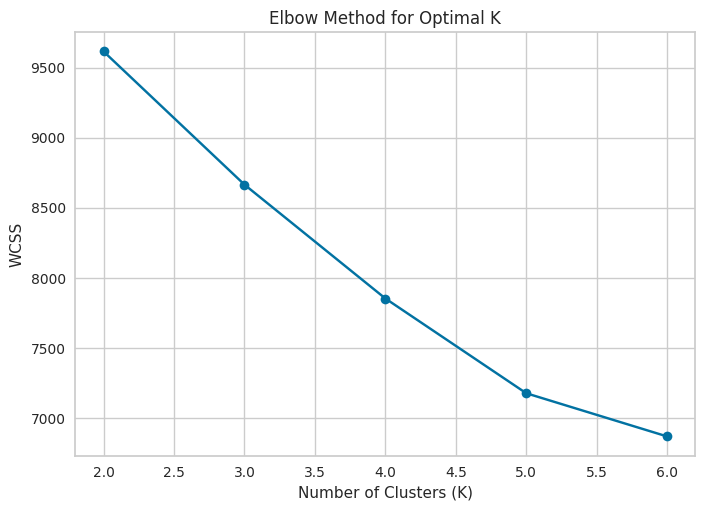

In [456]:

from kneed import KneeLocator

knee = KneeLocator(K_values, wcss, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.plot(K_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')

if turning_point is not None:
    plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
    plt.legend()
else:
    print("No clear elbow point found.")

plt.show()


there is no clear elbow point found, but from analysing the different WCSS calculated of our clusters (9615, 8665, 7853, 7177, 6869) we can clearly observe there's a bend that occurs at k=3, with the difference between k=1 and k=2 being almost 1000 than the differences between the other values are 802, 676 and 308 with implies that k = 3 is an elbow. Thus, the best number of clusters using elbow method is 3.

**Silhouette scores plot:**

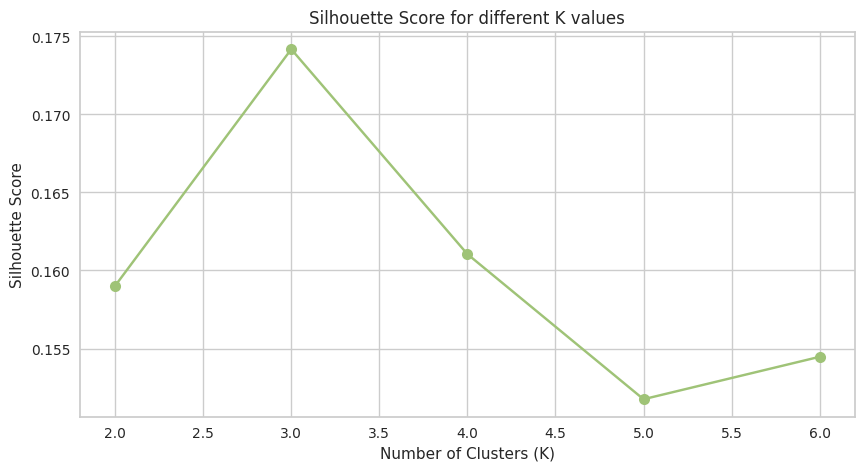

In [457]:
plt.figure(figsize=(10, 5))
plt.plot(K_values, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different K values')
plt.grid(True)
plt.show()

The highest average silhouette score is 0.174 with k = 3, and the second highest average is 0.161 with k = 4

**Silhouette visualization:**

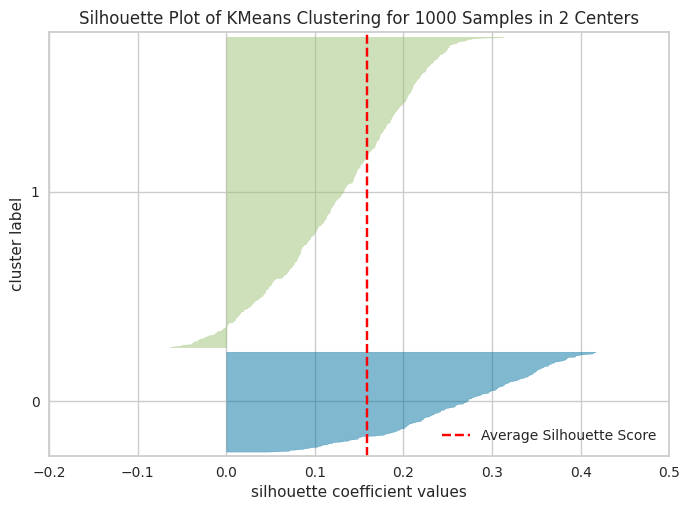

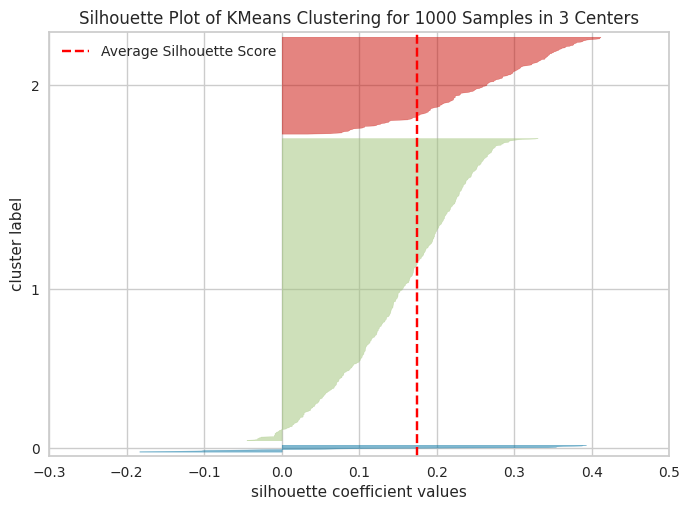

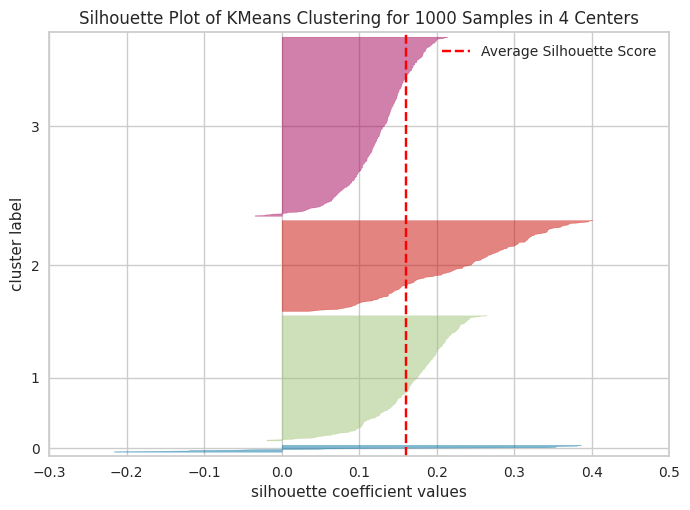

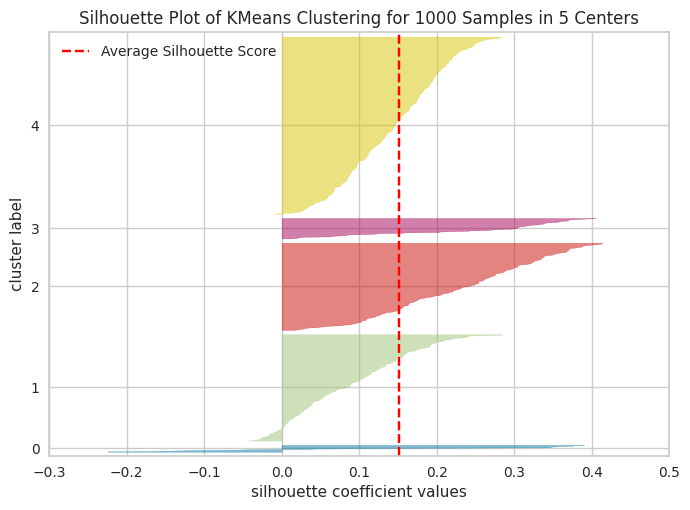

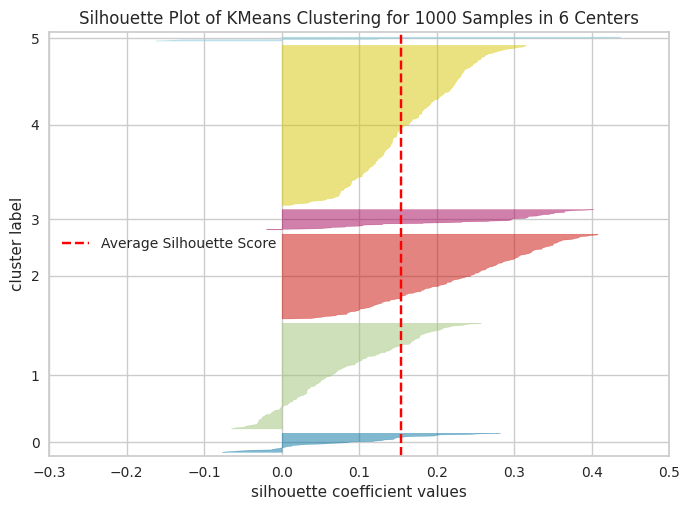

In [458]:
from yellowbrick. cluster import SilhouetteVisualizer

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer (kmeans, colors='yellowbrick')
    visualizer. fit(X_scaled)
    visualizer.show()

## Conclusion

**The metric values:** 
| Metric | k = 2 | k = 3  | k = 4 | k = 5 | k = 6|
|----------|----------|----------|----------|----------|----------|
| silhouette score	| 0.159  |0.174    | 0.161   | 0.152   |  0.154  |
| WCSS | 9614.87 | 8665.05    |7853.17| 7177.43 | 6869.34    |

*Silhouette Score:* Peaks at K=3 indicating the strongest cluster separation and cohesion.
*WCSS:* Decreases monotonically with higherK, as expected, but no clear "elbow".

The goal of this analysis was to apply K-means clustering to a diabetes dataset and evaluate the optimal number of clusters (K) using silhouette visualizations. We tested K values from 2 to 6 to explore potential groupings, motivated by:

- **K = 2:** A binary split (diabetic vs. non-diabetic).
- **K = 3:** Alignment with possible CLASS categories ( non-diabetic N, predict-diabetic P, diabetic Y).
- **K = 4 to 6:**  Exploration of finer sub-groups (e.g., severity levels or demographic patterns), though with a risk of overfitting.

*Silhouette visualizations* were used to assess cluster quality by examining silhouette coefficients, aiming to identify the K that best balances cohesion within clusters and separation between them.

Based on the silhouette plots, K = 3 is the optimal number of clusters for this dataset, with the highest average silhouette score (1.74) and the most balanced, well-separated clusters with minimal overlap between groups. This split likely corresponds to diabetic, non-diabetic and predict-diabetic groups, alligning with N, P and Y categories. K = 2 is a secondary option if the goal is to split to diabetic (P) and non-diabetic(N), with some overlap between groups. For K>3 there are negative coefficients suggesting missclassified samples, as well as overfitting.

***


K=3 is the optimal choice for this diabetes dataset, balancing statistical validity (Silhouette=0.174) and clinical relevance. Higher K values overfit the data, while K=2 oversimplifies it.